In [1]:
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#cross validation
from sklearn.model_selection import train_test_split

In [2]:
#Importing Data
rawData = pd.read_csv('CreditOne_Data_updated.csv')
rawData.head()

,ID,LIMIT_BAL,SEX,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,SEX_coded,Default_coded,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university
0,1.0,20000,female,1,24,2,2,-1,-1,-2,...,0,0,0,default,0,0,0,0,0,1
1,2.0,120000,female,2,26,-1,2,0,0,0,...,1000,0,2000,default,0,0,0,0,0,1
2,3.0,90000,female,2,34,0,0,0,0,0,...,1000,1000,5000,not default,0,1,0,0,0,1
3,4.0,50000,female,1,37,0,0,0,0,0,...,1100,1069,1000,not default,0,1,0,0,0,1
4,5.0,50000,male,1,57,-1,0,-1,0,0,...,9000,689,679,not default,1,1,0,0,0,1


In [3]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          29999 non-null  float64
 1   LIMIT_BAL                   29999 non-null  int64  
 2   SEX                         29999 non-null  object 
 3   MARRIAGE                    29999 non-null  int64  
 4   AGE                         29999 non-null  int64  
 5   PAY_0                       29999 non-null  int64  
 6   PAY_2                       29999 non-null  int64  
 7   PAY_3                       29999 non-null  int64  
 8   PAY_4                       29999 non-null  int64  
 9   PAY_5                       29999 non-null  int64  
 10  PAY_6                       29999 non-null  int64  
 11  BILL_AMT1                   29999 non-null  int64  
 12  BILL_AMT2                   29999 non-null  int64  
 13  BILL_AMT3                   299

## Selecting features

In [4]:
#Trying all features first as a baseline
X = rawData.iloc[:, [1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,24,26,27,28,29]]
print('Summary of feature sample')
X.head()

Summary of feature sample


,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_coded,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university
0,20000,1,24,2,2,-1,-1,-2,-2,3913,...,689,0,0,0,0,0,0,0,0,1
1,120000,2,26,-1,2,0,0,0,2,2682,...,1000,1000,1000,0,2000,0,0,0,0,1
2,90000,2,34,0,0,0,0,0,0,29239,...,1500,1000,1000,1000,5000,0,0,0,0,1
3,50000,1,37,0,0,0,0,0,0,46990,...,2019,1200,1100,1069,1000,0,0,0,0,1
4,50000,1,57,-1,0,-1,0,0,0,8617,...,36681,10000,9000,689,679,1,0,0,0,1


In [5]:
#dependent variable
y = rawData['Default_coded']
print(y)

0        0
1        0
2        1
3        1
4        1
        ..
29994    1
29995    1
29996    0
29997    0
29998    0
Name: Default_coded, Length: 29999, dtype: int64


# Assessing Models recursively DV: Default

In [6]:
algosClass = []

In [7]:
algosClass.append(('Random Forest Regressor',RandomForestRegressor()))

In [8]:
algosClass.append(('Linear Regression',LinearRegression()))

In [9]:
algosClass.append(('Support Vector Regression',SVR()))

In [10]:
results = []
names = []
for name, model in algosClass:
    result = cross_val_score(model, X,y, cv=3, scoring='r2')
    names.append(name)
    results.append(result)

In [11]:
for i in range(len(names)):
    print(names[i], results[i].mean())

Random Forest Regressor 0.182065907314963
Linear Regression 0.12100255618952031
Support Vector Regression -0.08517773416461538


## Choosing the best Model 

In [12]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.30, random_state=123)

In [13]:
#Random Forest Regressor is the best
algo = RandomForestRegressor()
model = algo.fit(X_train, y_train)
predictions = model.predict(X_test)

### Evaluation

In [14]:
#Establishing the variable calculation of RMSE
rmse = sqrt(mean_squared_error(y_test, predictions))

#Establishing the variable calculating r2
predRsquared = r2_score(y_test, predictions)

print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.187
RMSE: 0.374


### Plotting the Results 

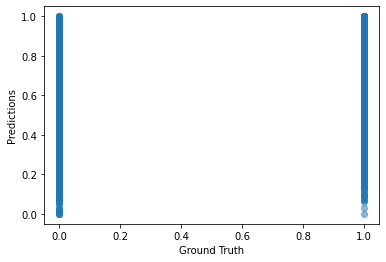

In [15]:
plt.scatter(y_test, predictions, cmap='viridis', alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show()

## Refining the features 

In [16]:
#omitting features that showed very low correlations including bill amts & pmt amts
X = rawData.iloc[:, [1,3,4,5,6,7,8,9,10,24,26,27,28,29]]
#dependent variable
y = rawData['Default_coded']

print('Summary of feature sample')
X.head()

Summary of feature sample


,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,SEX_coded,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university
0,20000,1,24,2,2,-1,-1,-2,-2,0,0,0,0,1
1,120000,2,26,-1,2,0,0,0,2,0,0,0,0,1
2,90000,2,34,0,0,0,0,0,0,0,0,0,0,1
3,50000,1,37,0,0,0,0,0,0,0,0,0,0,1
4,50000,1,57,-1,0,-1,0,0,0,1,0,0,0,1


## Rerunning Model, DV: Default

In [17]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.25, random_state=123)

In [18]:
#Random Forest Regressor
algo = RandomForestRegressor()
model = algo.fit(X_train, y_train)
predictions = model.predict(X_test)

### Evaluation

In [19]:
#Establishing the variable calculation of RMSE
rmse = sqrt(mean_squared_error(y_test, predictions))

#Establishing the variable calculating r2
predRsquared = r2_score(y_test, predictions)

print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.112
RMSE: 0.389


No improvement

# Assessing Models recursively, DV: Limit Balance

In [20]:
#Trying all features first as a baseline
X = rawData.iloc[:, [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,24,25,26,27,28,29]]
#dependent variable
y = rawData['LIMIT_BAL']

print('Summary of feature sample')
X.head()

Summary of feature sample


,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_coded,Default_coded,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university
0,1,24,2,2,-1,-1,-2,-2,3913,3102,...,0,0,0,0,0,0,0,0,0,1
1,2,26,-1,2,0,0,0,2,2682,1725,...,1000,1000,0,2000,0,0,0,0,0,1
2,2,34,0,0,0,0,0,0,29239,14027,...,1000,1000,1000,5000,0,1,0,0,0,1
3,1,37,0,0,0,0,0,0,46990,48233,...,1200,1100,1069,1000,0,1,0,0,0,1
4,1,57,-1,0,-1,0,0,0,8617,5670,...,10000,9000,689,679,1,1,0,0,0,1


In [21]:
algosClass = []
algosClass.append(('Random Forest Regressor',RandomForestRegressor()))
algosClass.append(('Linear Regression',LinearRegression()))
algosClass.append(('Support Vector Regression',SVR()))

In [22]:
results = []
names = []
for name, model in algosClass:
    result = cross_val_score(model, X,y, cv=3, scoring='r2')
    names.append(name)
    results.append(result)

In [23]:
for i in range(len(names)):
    print(names[i], results[i].mean())

Random Forest Regressor 0.46719858692542715
Linear Regression 0.35696061746451235
Support Vector Regression -0.05033431622630332


## Choosing the best Model 

In [24]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.25, random_state=123)

In [25]:
#Random Forest Regressor is the best
algo = RandomForestRegressor()
model = algo.fit(X_train, y_train)
predictions = model.predict(X_test)

### Evaluation

In [26]:
#Establishing the variable calculation of RMSE
rmse = sqrt(mean_squared_error(y_test, predictions))

#Establishing the variable calculating r2
predRsquared = r2_score(y_test, predictions)

print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.462
RMSE: 93732.329


Better than Default as DV but needs to be improved

### Plotting the Results 

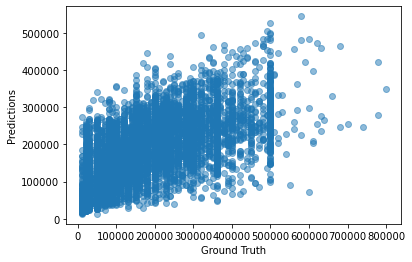

In [28]:
plt.scatter(y_test, predictions, cmap='viridis', alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show()

## Refining the features, DV: Limit Balance 

In [29]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          29999 non-null  float64
 1   LIMIT_BAL                   29999 non-null  int64  
 2   SEX                         29999 non-null  object 
 3   MARRIAGE                    29999 non-null  int64  
 4   AGE                         29999 non-null  int64  
 5   PAY_0                       29999 non-null  int64  
 6   PAY_2                       29999 non-null  int64  
 7   PAY_3                       29999 non-null  int64  
 8   PAY_4                       29999 non-null  int64  
 9   PAY_5                       29999 non-null  int64  
 10  PAY_6                       29999 non-null  int64  
 11  BILL_AMT1                   29999 non-null  int64  
 12  BILL_AMT2                   29999 non-null  int64  
 13  BILL_AMT3                   299

In [30]:
#omitting features that showed low correlations including sex(24) & education other(28)
X = rawData.iloc[:, [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,25,26,27,29]]
#dependent variable
y = rawData['LIMIT_BAL']

print('Summary of feature sample')
X.head()

Summary of feature sample


,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default_coded,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_university
0,1,24,2,2,-1,-1,-2,-2,3913,3102,...,0,689,0,0,0,0,0,0,0,1
1,2,26,-1,2,0,0,0,2,2682,1725,...,0,1000,1000,1000,0,2000,0,0,0,1
2,2,34,0,0,0,0,0,0,29239,14027,...,1518,1500,1000,1000,1000,5000,1,0,0,1
3,1,37,0,0,0,0,0,0,46990,48233,...,2000,2019,1200,1100,1069,1000,1,0,0,1
4,1,57,-1,0,-1,0,0,0,8617,5670,...,2000,36681,10000,9000,689,679,1,0,0,1


## Rerunning Model 

In [31]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.25, random_state=123)

In [32]:
#Random Forest Regressor
algo = RandomForestRegressor()
model = algo.fit(X_train, y_train)
predictions = model.predict(X_test)

### Evaluation

In [33]:
#Establishing the variable calculation of RMSE
rmse = sqrt(mean_squared_error(y_test, predictions))

#Establishing the variable calculating r2
predRsquared = r2_score(y_test, predictions)

print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.463
RMSE: 93652.125


No improvement

# Checking if Classification is better than Regression

## Begin with Discritizing Limit Bal 

In [34]:
rawData['LIMIT_BAL'].describe()

count     29999.000000
mean     167456.571219
std      129660.756640
min       10000.000000
25%       50000.000000
50%      140000.000000
75%      240000.000000
max      800000.000000
Name: LIMIT_BAL, dtype: float64

In [35]:
bins = (0, 100000, 200000, 400000, 800000)
group_names = ['Low', 'Moderate', 'High', 'Very High']

#Creating a new column called LIMIT_BAL_CAT
rawData['LIMIT_BAL_CAT'] = pd.cut(rawData['LIMIT_BAL'], bins = bins, labels = group_names, ordered=True)

In [36]:
rawData['LIMIT_BAL_CAT'].unique()

['Low', 'Moderate', 'Very High', 'High']
Categories (4, object): ['Low' < 'Moderate' < 'High' < 'Very High']

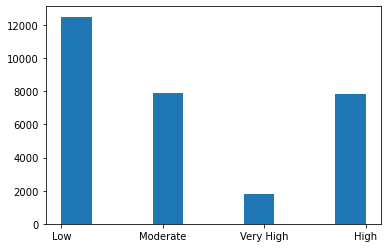

In [37]:
#Distribution of limit balance categories
plt.hist(rawData['LIMIT_BAL_CAT'])
plt.show()

## Comparing Classification Models

In [38]:
#SKLearn classification items
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree

In [39]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   ID                          29999 non-null  float64 
 1   LIMIT_BAL                   29999 non-null  int64   
 2   SEX                         29999 non-null  object  
 3   MARRIAGE                    29999 non-null  int64   
 4   AGE                         29999 non-null  int64   
 5   PAY_0                       29999 non-null  int64   
 6   PAY_2                       29999 non-null  int64   
 7   PAY_3                       29999 non-null  int64   
 8   PAY_4                       29999 non-null  int64   
 9   PAY_5                       29999 non-null  int64   
 10  PAY_6                       29999 non-null  int64   
 11  BILL_AMT1                   29999 non-null  int64   
 12  BILL_AMT2                   29999 non-null  int64   
 13  BILL_AMT3       

In [40]:
X = rawData.iloc[:, [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,24,25,26,27,28,29]]
y = rawData['LIMIT_BAL_CAT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 123)

In [41]:
algos_Class = []
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))
algos_Class.append(('Gradient Boosting Classifier', GradientBoostingClassifier()))

In [42]:
results = []
names = []
for name, model in algos_Class:
    result = cross_val_score(model, X,y, cv=3, scoring='accuracy')
    names.append(name)
    results.append(result)

In [43]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Classifier 0.6211537653765377
Decision Tree Classifier 0.5218505650565056
Gradient Boosting Classifier 0.6274539920658732


Gradient Boosting Classifier is slightly better than Random Forest, however still not high enough accuracy

## Choosing the best Classifier Model 

In [44]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.25, random_state=123)

In [45]:
#Gradient Boosting Classifier is the best
algo = GradientBoostingClassifier()
model = algo.fit(X_train, y_train)
predictions = model.predict(X_test)

### Evaluation

In [47]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

        High       0.51      0.60      0.55      1959
         Low       0.73      0.86      0.79      3048
    Moderate       0.54      0.40      0.46      2057
   Very High       0.62      0.14      0.23       436

    accuracy                           0.62      7500
   macro avg       0.60      0.50      0.51      7500
weighted avg       0.61      0.62      0.60      7500



Low metrics and accuracy is not reliable enough

In [48]:
#importances of variables sorted
pd.DataFrame({'Variable_Name':X.columns,'Importance':model.feature_importances_}).sort_values('Importance')

,Variable_Name,Importance
24,EDUCATION_other,0.000445
25,EDUCATION_university,0.000487
6,PAY_5,0.001115
0,MARRIAGE,0.002064
20,SEX_coded,0.004920
21,Default_coded,0.005815
7,PAY_6,0.010456
23,EDUCATION_high school,0.010718
11,BILL_AMT4,0.013599
5,PAY_4,0.015294


## Visualizing the Decision Tree 

In [49]:
algo = DecisionTreeClassifier(max_depth=3)
model = algo.fit(X_train, y_train)
preds = model.predict(X_test)

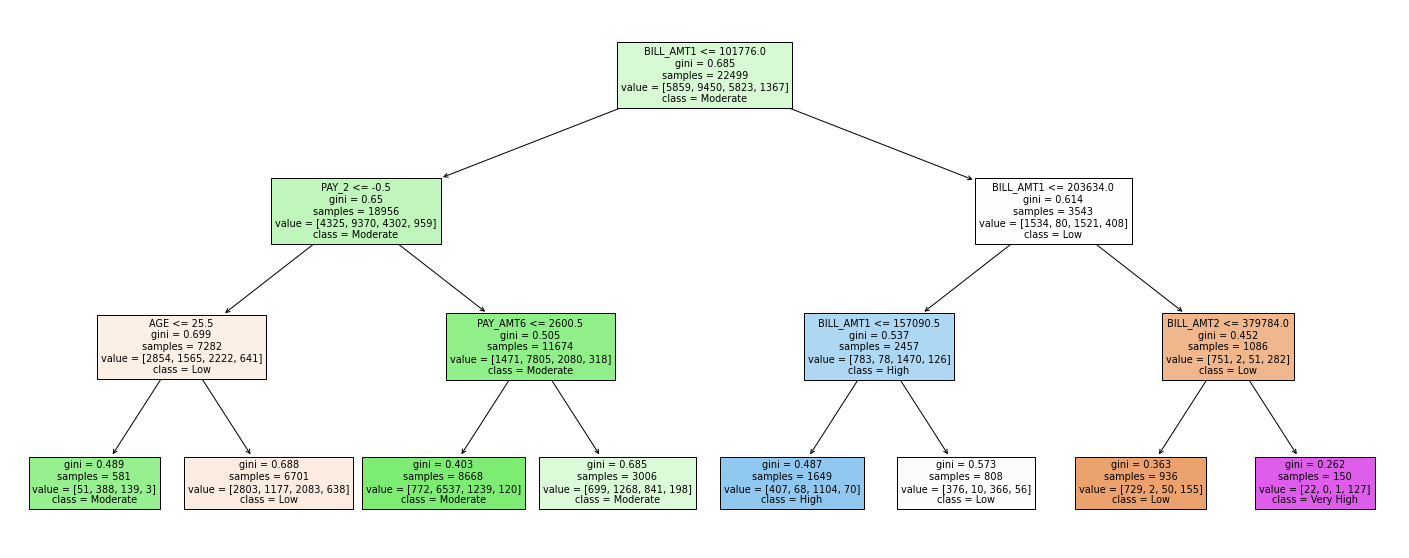

In [50]:
fig = plt.figure(figsize=(25,10))
tree = plot_tree(model, feature_names=X.columns, class_names=['Low','Moderate','High','Very High'], filled=True)

demographics don't seem to have much effect on prediction